# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [1]:
import torch as th

1\. Создайте тензор и исследуйте его основные характеристики

In [2]:
4, type(4)

(4, int)

In [9]:
a = th.randint(0, 10, size=(10, 5), dtype=th.float32)
a = th.randint(0, 10, size=(10, 5)).float()
a = th.randint(0, 10, size=(10, 5)).to(dtype=th.float32)
a.dtype

torch.float32

In [10]:
# a.pow(2)
#a.zero_()

In [ ]:
import numpy as np

np.sum(a)

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [12]:
t = th.randint(0, 100, size=(5, 3, 3))
t

tensor([[[98, 19, 94],
         [ 0,  1, 79],
         [50, 41,  1]],

        [[59, 75, 72],
         [63, 30, 51],
         [21, 98,  2]],

        [[92, 30, 23],
         [14, 85, 62],
         [77, 95,  2]],

        [[32, 11, 39],
         [80, 48, 66],
         [97, 13, 39]],

        [[15, 65, 68],
         [25,  0, 47],
         [69, 99,  8]]])

In [13]:
t

tensor([[[98, 19, 94],
         [ 0,  1, 79],
         [50, 41,  1]],

        [[59, 75, 72],
         [63, 30, 51],
         [21, 98,  2]],

        [[92, 30, 23],
         [14, 85, 62],
         [77, 95,  2]],

        [[32, 11, 39],
         [80, 48, 66],
         [97, 13, 39]],

        [[15, 65, 68],
         [25,  0, 47],
         [69, 99,  8]]])

In [14]:
t[0] # t[0, :, :]
t[:, 0]

tensor([[98, 19, 94],
        [59, 75, 72],
        [92, 30, 23],
        [32, 11, 39],
        [15, 65, 68]])

In [15]:
t[:, :, [0, 2, 0, 2]]

tensor([[[98, 94, 98, 94],
         [ 0, 79,  0, 79],
         [50,  1, 50,  1]],

        [[59, 72, 59, 72],
         [63, 51, 63, 51],
         [21,  2, 21,  2]],

        [[92, 23, 92, 23],
         [14, 62, 14, 62],
         [77,  2, 77,  2]],

        [[32, 39, 32, 39],
         [80, 66, 80, 66],
         [97, 39, 97, 39]],

        [[15, 68, 15, 68],
         [25, 47, 25, 47],
         [69,  8, 69,  8]]])

In [16]:
t[:, :, [False, True, False]] # t[:, :, [1]]

tensor([[[19],
         [ 1],
         [41]],

        [[75],
         [30],
         [98]],

        [[30],
         [85],
         [95]],

        [[11],
         [48],
         [13]],

        [[65],
         [ 0],
         [99]]])

In [17]:
t[:, 0] = 99

In [18]:
t = th.zeros(5, 5)
t

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [19]:
idx = th.arange(5)
t[idx, idx] = 1
t

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [20]:
t = th.arange(16).reshape(4, 4)
t

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [21]:
s = th.tensor([1, -1, 1, -1])

In [22]:
t.shape, s.shape

(torch.Size([4, 4]), torch.Size([4]))

In [23]:
t + s

tensor([[ 1,  0,  3,  2],
        [ 5,  4,  7,  6],
        [ 9,  8, 11, 10],
        [13, 12, 15, 14]])

4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [24]:
# np.sin(t)
th.sin(t)

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794,  0.6570],
        [ 0.9894,  0.4121, -0.5440, -1.0000],
        [-0.5366,  0.4202,  0.9906,  0.6503]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
MinMaxScaler().fit_transform(t)

array([[0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        , 1.        ]])

In [27]:
t.numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [32]:
import random

In [37]:
t = th.zeros(size=(100000, 10))
ind = np.arange(100000)
col = np.random.choice(10, size=(100000))
t[ind, col] = 1

In [38]:
t

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [45]:
srednee= th.mean(t, axis=0)
srednee

tensor([0.1002, 0.0999, 0.0995, 0.1005, 0.0999, 0.1002, 0.1006, 0.0996, 0.0986,
        0.1010])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [44]:
tensor = th.randint(0, 11, size=(10, 10))
diag= tensor[th.triu_indices(10, 1)]
diag


tensor([[[2, 0, 7, 0, 7, 6, 1, 8, 9, 5]],

        [[2, 0, 7, 0, 7, 6, 1, 8, 9, 5]]])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

In [224]:
t = th.randint(0, 101, size=(5, 5))
a = t.clone()
t

tensor([[16, 23, 65, 92, 49],
        [72, 14, 47, 32, 20],
        [20, 87, 33,  6, 24],
        [37, 76, 34, 21, 38],
        [ 0, 90, 39, 41, 41]])

In [225]:
value=th.max(t)
value#Максимальный элемент

tensor(92)

In [226]:
ind = th.where(t  == value)

In [227]:
ind

(tensor([0]), tensor([3]))

In [228]:
max_row, max_col = ind[0][0], ind[1][0]

In [229]:
row_1 = max_row - 1
row_2 = max_row + 2
col_1= max_col - 1
col_2 = max_col + 2

In [230]:
for i in range(t.shape[0]):
    for j in range(t.shape[1]):
        if i < row_1 or i > row_2 or j < col_1 or j > col_2:
            t[i, j] = 0

In [231]:
t

tensor([[ 0,  0, 65, 92, 49],
        [ 0,  0, 47, 32, 20],
        [ 0,  0, 33,  6, 24],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

In [232]:
threed_tensor = th.stack((t, a), dim=0)
threed_tensor

tensor([[[ 0,  0, 65, 92, 49],
         [ 0,  0, 47, 32, 20],
         [ 0,  0, 33,  6, 24],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[16, 23, 65, 92, 49],
         [72, 14, 47, 32, 20],
         [20, 87, 33,  6, 24],
         [37, 76, 34, 21, 38],
         [ 0, 90, 39, 41, 41]]])

In [233]:
th.save(threed_tensor, 'tensor.pt')

In [234]:
threed_tensor_load = th.load('tensor.pt')

In [235]:
sovpadenie = th.equal(threed_tensor_load, threed_tensor)

if sovpadenie:
    print("Все элементы совпадают.")
else:
    print("Элементы не совпадают.")

Все элементы совпадают.


<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [200]:
t = th.randint(1, 11, size=(2, 3, 5, 5), dtype=th.float32)
t

tensor([[[[ 2.,  7.,  3.,  3.,  5.],
          [10.,  5., 10.,  7.,  3.],
          [ 3.,  9.,  2.,  7.,  4.],
          [ 2.,  6., 10.,  6.,  7.],
          [ 9.,  9.,  8.,  8.,  4.]],

         [[ 1.,  7.,  7.,  3.,  7.],
          [ 9.,  6.,  5.,  6.,  2.],
          [ 4.,  3.,  2.,  6.,  6.],
          [ 8.,  6.,  3.,  2.,  1.],
          [ 3.,  5.,  4.,  2.,  8.]],

         [[ 2.,  6.,  2.,  4.,  7.],
          [ 7.,  6.,  4.,  2.,  4.],
          [ 8.,  5., 10.,  2.,  9.],
          [ 9.,  8.,  2.,  2.,  3.],
          [ 4.,  7.,  9.,  3.,  3.]]],


        [[[ 3.,  3.,  3.,  3., 10.],
          [ 1.,  1.,  1., 10.,  8.],
          [ 6.,  1.,  1., 10.,  1.],
          [ 8.,  3.,  7.,  4.,  8.],
          [ 2.,  6., 10.,  8.,  6.]],

         [[ 8.,  1.,  7., 10.,  6.],
          [ 7.,  6.,  5.,  7.,  8.],
          [ 4.,  7.,  9.,  9.,  5.],
          [ 9.,  4.,  7.,  5.,  6.],
          [ 7.,  8.,  2.,  6.,  3.]],

         [[10.,  4.,  2.,  4.,  8.],
          [ 2.,  9.,  8., 

In [205]:
mean_tenzor = th.mean(t, dim=(2, 3))
mean_tenzor

tensor([[5.9600, 4.6400, 5.1200],
        [4.9600, 6.2400, 5.3200]])

In [210]:
mean_tenzor = mean_tenzor.unsqueeze(2)
mean_tenzor

tensor([[[[5.9600]],

         [[4.6400]],

         [[5.1200]]],


        [[[4.9600]],

         [[6.2400]],

         [[5.3200]]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

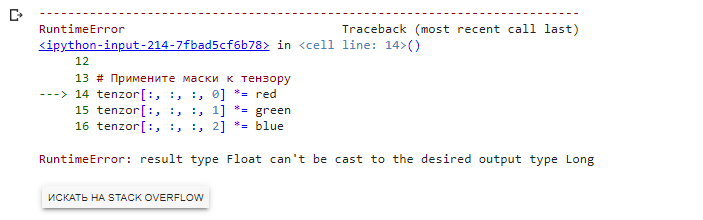

In [219]:
import torch as th

tenzor = th.randint(0, 256, size=(10, 6, 6, 3),dtype=th.float32)

# Для оттенков красного обнулите все столбцы, кроме первых двух
red = th.zeros(6)
red[:2] = 1
#для оттенков зеленого обнулите столбцы со второго по четвертый
green = th.zeros(6)
green[1:4] = 1
#для оттенков синего обнулите пятый и шестой столбцы
blue = th.zeros(6)
blue[4:6] = 1

tenzor[:, :, :, 0] *= red
tenzor[:, :, :, 1] *= green
tenzor[:, :, :, 2] *= blue


tenzor

tensor([[[[ 68.,   0.,   0.],
          [141., 221.,   0.],
          [  0., 247.,   0.],
          [  0., 241.,   0.],
          [  0.,   0., 102.],
          [  0.,   0.,   8.]],

         [[191.,   0.,   0.],
          [145., 145.,   0.],
          [  0.,  54.,   0.],
          [  0., 175.,   0.],
          [  0.,   0., 230.],
          [  0.,   0., 121.]],

         [[190.,   0.,   0.],
          [ 24.,  51.,   0.],
          [  0.,  16.,   0.],
          [  0.,  80.,   0.],
          [  0.,   0., 115.],
          [  0.,   0.,  43.]],

         [[176.,   0.,   0.],
          [ 30.,  69.,   0.],
          [  0., 136.,   0.],
          [  0.,   1.,   0.],
          [  0.,   0.,  14.],
          [  0.,   0., 203.]],

         [[198.,   0.,   0.],
          [ 42., 131.,   0.],
          [  0.,  67.,   0.],
          [  0., 118.,   0.],
          [  0.,   0.,  62.],
          [  0.,   0.,  35.]],

         [[ 22.,   0.,   0.],
          [165., 136.,   0.],
          [  0.,  74.,   0.],


## Обратная связь
- [ ] Хочу получить обратную связь по решению